In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts

from libs.dataset import DataSet
from libs.training import Training
from libs.graphics import Graphics

[OK]    From xlsx to csv.
[OK]    DataFrame normalizado
[OK]    Get characteristic
[OK]    Grafics from CRIM.
[OK]    Grafics from ZN.
[OK]    Grafics from INDUS.
[OK]    Grafics from CHAS.
[OK]    Grafics from NOX.
[OK]    Grafics from RM.
[OK]    Grafics from AGE.
[OK]    Grafics from DIS.
[OK]    Grafics from RAD.
[OK]    Grafics from TAX.
[OK]    Grafics from PTRATIO.
[OK]    Grafics from B.
[OK]    Grafics from LSTAT.


AttributeError: 'Training' object has no attribute 'get_hiperparameters'

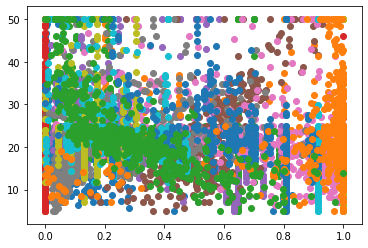

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts

from libs.dataset import DataSet
from libs.training import Training
from libs.graphics import Graphics



def main(dataframe):
    x_features, y_labels = ds.get_characteristic(_dataframe=dataframe)
    gphs.graphics(x_features, y_labels)                            #Grafico las trece caracteristicas

    # Separo entre datos de entrenamiento y datos de test
    x_features_training, x_features_test, y_labels_training, y_labels_test = tts(x_features, y_labels, test_size=0.2)
    learning_rate, num_epochs, display_step, rows, columns = trng.get_hiperparameters(x_features_training)

    #Creo mis placeholders para las features y caracteristica y mi variables.
    X_features_ph, Y_labels_ph = trng.get_placeholders(rows=rows, colms=columns)
    theta, theta_cero = trng.get_variables(colms=columns)

    # Obtengo la media de mi funcion de costo
    y_labels_training_tmp = tf.cast(y_labels_training, tf.float32)   #Recuerda que se te presento el error de floar64 proveniente del MatMul
    mean_J = trng.get_mean_j(y_labels_training_tmp, X_features_ph)

    # Optimizer
    optimizer = trng.tftGDO()

    print('\n\tStart Trainig...\r\n')
    train_cost = []
    ep = []
    with tf.name_scope("starting_tensorflow_session"):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for epoch in range(num_epochs):
                _, t_cost = sess.run([optimizer, mean_J], feed_dict={X_features_ph: x_features_training, Y_labels_ph: y_labels_training})
                train_cost.append(t_cost)
                ep.append(epoch)
                if (epoch+1) % display_step == 0:
                    print("Epoch: {}".format(epoch + 1), "train_cost={:0.4f}".format(t_cost))
            print('Entrenamiento Finalizado')
            th = sess.run(theta)
            th0 = sess.run(theta_cero)
    gphs.graphics_with_plot(ep,train_cost)

if __name__=='__main__':
    trng = Training()
    gphs = Graphics()
    ruta_xlsx = '~/Documents/2019-2/Automatas/modelos/machine/lab_uno/dataset/boston.xlsx'
    ruta = 'dataset/boston.csv'
    ds = DataSet(ruta)                                                          # Inicializo mi clase dataset
    ds.convert_dataset_from_xlsx_to_csv(ruta_xlsx)
    dataset = ds.get_dataset()
    #Creamos el dataframe
    dataframe = ds.data_to_norm(pd.DataFrame(dataset))   # Primero se convierte a un dataframe de pandas>> dataframe = pd.DataFrame(dataset)
    main(dataframe)
